## Analyzing the Relationship between Renewable Energy Adoption, CO2 Emissions, and Economic Growth in Germany, Sweden, and Bulgaria (2000–2021)

### 1. Introduction

Over the past few decades, the need of solving environmental problems and climate change has drawn attention from all over the world. Converting from fossil fuels to renewable energy is one of the most significant aspects of this issue. Therefore, it is necessary to comprehend the dynamics between the usage of renewable energy, economic performance, and environmental impact in order to identify connection that may affect future decisions

Analysis of these dynamics may be done with fascinating case studies from Germany, Sweden, and Bulgaria. These nations deal with renewable energy with different energy profiles and economic systems. Through a two-decade comprehensive analysis of these countries, the following main question is needed to be answered: 

**How have GDP and the adoption of renewable energy sources (total energy generation, renewable energy generation, share of generation) influenced energy consumption and CO2 emissions in Germany, Sweden, and Bulgaria from 2000 to 2021?**

### 2. Data Sources and Preparation

##### 2.1. Data Sources

**Data source 1: European Electricity Datasets**
- **Metadata URL**: [European Electricity 2022](https://ember-climate.org/insights/research/european-electricity-review-2022/#supporting-material)
- **Saved CSV Name**: *"demand.csv","emission.csv","generation.csv"*
- **Description**: These collection of datasets provide information related to energy consumption, CO2 emissions, and electricity generation. This dataset has been limited to the precise countries (Germany, Sweden, and Bulgaria) from 2000-2021
- **Domain-Specific Value Types**:  
   - *demand.csv*: Total electricity demand in TeraWatt-hours (TWh) and Electricity demand per capita in MegaWatt-hours (MWh)
   - *emissions.csv*: Amount of CO2 emissions produced per Kilowatt-hour (gCO2/kWH) of electricity generated and Total emissions in million tonnes of CO2 equivalent (MTcO2e)
   - *generation.csv*: Category of different fuel type (Fuel Code), Amount of electricity generated in Terawatt-hours (TWh), and percentage of total electricity generation (%) contributed by each fuel type 
- **Data Structure and License**: each dataset is structured as a tabular format (CSV file). Data sourced from the [EMBER](ember-climate.org) under the license CC-BY-4.0 (Link: [License](https://ember-climate.org/creative-commons/))

**Data source 2: World GDP Dataset**
- **Metadata URL**: [World Bank GDP Metadata](https://databank.worldbank.org/reports.aspx?source=2&type=metadata&series=NY.GDP.MKTP.CD)
- **Saved CSV Name**: *"world_gdp.csv"*
- **Description**: This dataset provides annual GDP figures in US dollars for all countries. Similar to Data source 1, this dataset also has been filtered to only Germany,Sweden and Bulgaria from 2000-2021
- **Domain-Specific Value Types**: The total economic output of each country in Billion US dollars (GDP Billion US$)
- **Data Structure and License**: The dataset is structured as a tabular format (CSV file). Data sourced from the [World Bank](https://data.worldbank.org/) under the license CC-BY-4.0 (Link: [License](https://datacatalog.worldbank.org/public-licenses#cc-by))



##### 2.2. Preparation

First, every saved CSV data is loaded as a Dataframe. A few necessary packages, including seaborn, matplotlib.pyplot, and pandas, are imported. The *generation* dataset is first limited to the fuel types of renewable energy (Bioenergy, Hydro, Solar, Wind, Other Renewables) and recorded as a new dataframe (*df_generation_renew*). From the *generation* dataset, a new aggregated dataframe (*df_total_combined*) for total energy generation (TWh) and total renewable share (%) for all countries is also constructed. Lastly, for simpler observation, this new dataframe (*df_total_combined*) is merged with the current dataframes (*demand*, *emission*, *world_gdp*) and stored as a combined dataframe (*df_final_combined*). We will visualize using only both of these new dataframes (*df_generation_renew*) and (*df_final_combined*) through the analysis.

In [ ]:
%pip install pandas
%pip install matplotlib.pyplot
%pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load table demand, emission, generation, world gdp
df_demand = pd.read_csv('../Data/demand.csv')
df_emission = pd.read_csv('../Data/emission.csv')
df_generation = pd.read_csv('../Data/generation.csv')
df_world_gdp = pd.read_csv('../Data/world_gdp.csv')

# filter df_generation to only renewable energy fuel type
renewable_sources = ["BIO", "HYDRO", "OTHRENEW", "SOLAR", "WIND"]
df_generation_renew = df_generation[df_generation['Fuel Code'].isin(renewable_sources)]

# create new dataframe of total electricity generation and total renewable share for all countries from 2000-2021
total_generation_df = df_generation.groupby(['Country Name', 'Year'])['Electricity Generation (TWh)'].sum().reset_index().rename(columns={'Electricity Generation (TWh)': 'Total Electricity Generation (TWh)'})
total_share_renew = df_generation_renew.groupby(['Country Name', 'Year'])['Share of Generation (%)'].sum().reset_index().rename(columns={'Share of Generation (%)': 'Total Renewable Share (%)'})
df_total_combined = pd.merge(total_generation_df, total_share_renew, on=['Country Name', 'Year'], how='inner')

# Merge df_world_gdp,, df_demand, df_emission, and df_total_combined for easier analysis
temp_1 = pd.merge(df_world_gdp, df_demand, how='inner', on=['Country Name','Year'])
temp_2 = pd.merge(temp_1, df_emission, how='inner', on=['Country Name','Year'])
df_final_combined = pd.merge(temp_2,df_total_combined,how='inner',on=['Country Name','Year'])
#df_final_combined.head()
#df_generation_renew.head()

### 4. Analysis

##### 4.1. Economic Growth and CO2 Emissions
First we will explore how GDP correlates with CO2 emissions (total emissions of CO2 equivalent). This visualization will enable us to spot any new trends that could suggest whether or not sustainable economic development is being achieved.

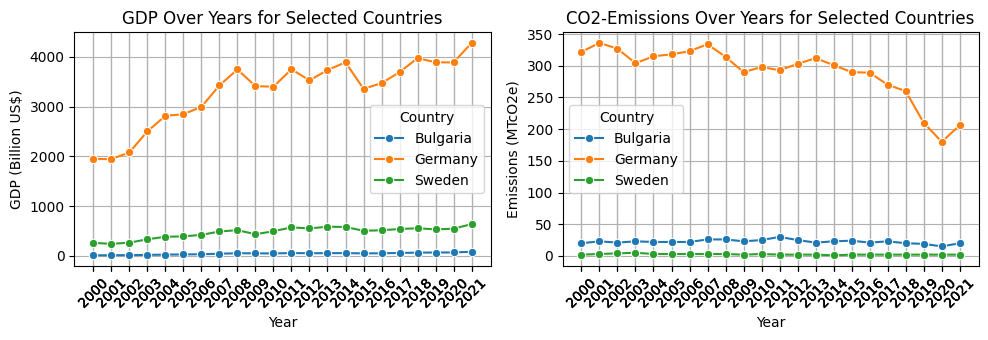

In [3]:
# Create a grid of subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))

# Plot for GDP
sns.lineplot(data=df_final_combined, x='Year', y='GDP (Billion US$)', hue='Country Name', marker='o', ax=ax[0])
ax[0].set_title('GDP Over Years for Selected Countries')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP (Billion US$)')
ax[0].legend(title='Country')
ax[0].grid(True)
ax[0].set_xticks(df_final_combined['Year']) 
ax[0].xaxis.set_tick_params(rotation=45)

# Plot for Emissions
sns.lineplot(data=df_final_combined, x='Year', y='Emissions (MTcO2e)', hue='Country Name', marker='o', ax=ax[1])
ax[1].set_title('CO2-Emissions Over Years for Selected Countries')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Emissions (MTcO2e)')
ax[1].legend(title='Country')
ax[1].grid(True)
ax[1].set_xticks(df_final_combined['Year'])  
ax[1].xaxis.set_tick_params(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

* The GDP growth in Germany is clearly decoupling from CO2 emissions. Germany's GDP climbed by 119.6%, while its CO2 emissions fell by 36.02%.
* Although the emissions levels for Sweden and Bulgaria were steady rather than rising, they also show a type of decoupling where GDP growth (Sweden by 143.9% and Bulgaria by 546.1%) does not result in an increase in emissions. 

The evidence points to countries with economic growth being able to sustain or even lower their CO2 output. That does not, however, always result in worsening environmental damage. Let us examine now how the use of renewable energy fits into this dynamic in each country for a more comprehensive picture.

##### 4.2. Renewable Energy Adoption

How they include renewable sources into their energy profile might be shown by visualizing the share of generation by fuel type over time. We can assess if they are heading toward a sustainable economic growth by looking at the trends in GDP and renewable energy.

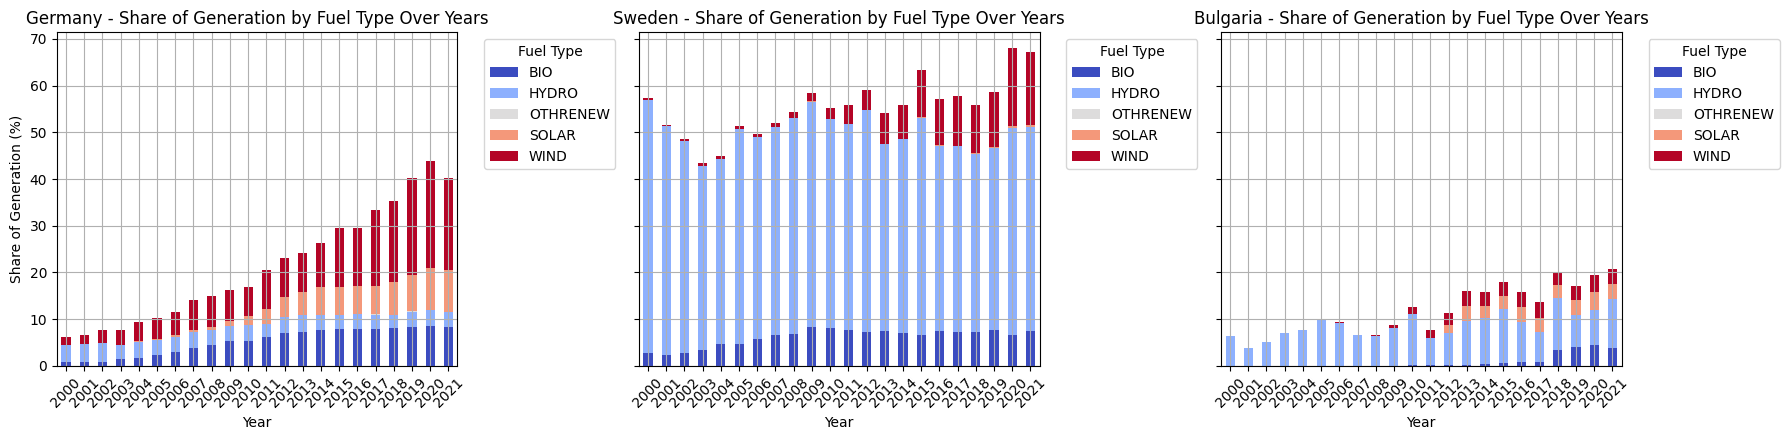

In [6]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4.5), sharey=True)

# Loop through each country
for index, country in enumerate(['Germany', 'Sweden', 'Bulgaria']):
    ax = axes[index]
    df_country = df_generation_renew[df_generation_renew['Country Name'] == country]
    
    # Pivot the dataframe for stacked bar chart
    pivot_df = df_country.pivot(index='Year', columns='Fuel Code', values='Share of Generation (%)')
    
    # Plot the stacked bar chart
    pivot_df.plot(kind='bar', stacked=True, ax=ax, cmap='coolwarm')
    
    # Set labels and titles
    ax.set_ylabel('Share of Generation (%)')
    ax.set_title(f'{country} - Share of Generation by Fuel Type Over Years')
    ax.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.grid(True)
    
    # Set x-axis ticks to show every year
    ax.set_xticks(range(len(df_country['Year'].unique())))
    ax.set_xticklabels(df_country['Year'].unique(), rotation=45)
    
# Adjust layout and show plot
plt.tight_layout()
plt.show()

* Germany shows their significant wind power investment. Mostly in the northern areas, Germany has strong onshore wind resources that provide large wind shares (1.63% to 19.90%) between 2000 and 2021. Additionally, there has been a steady increase in solar (0.01% to 8.79%) and bioenergy (0.76% to 8.43%)
* Sweden demonstrates how it depends mostly on renewable energy since 2021 and gains from abundant freshwater supplies due to many lakes and rivers. Over the years, hydropower consistently accounted for 40–53% of the generation.
* Though still less than 20% of all renewable energy is produced in Bulgaria, hydropower appears to be the most common renewable source. Adoption of wind, solar and bioenergy has been steadily increasing since 2012.  

Now let's take a look how this adoption impact the energy consumption and emissions in each countries.

##### 4.3. Impact of Renewable Energy Adoption on Energy Consumption and CO2-Emissions
4.3.1. Impact on Electricity Demand per Capita

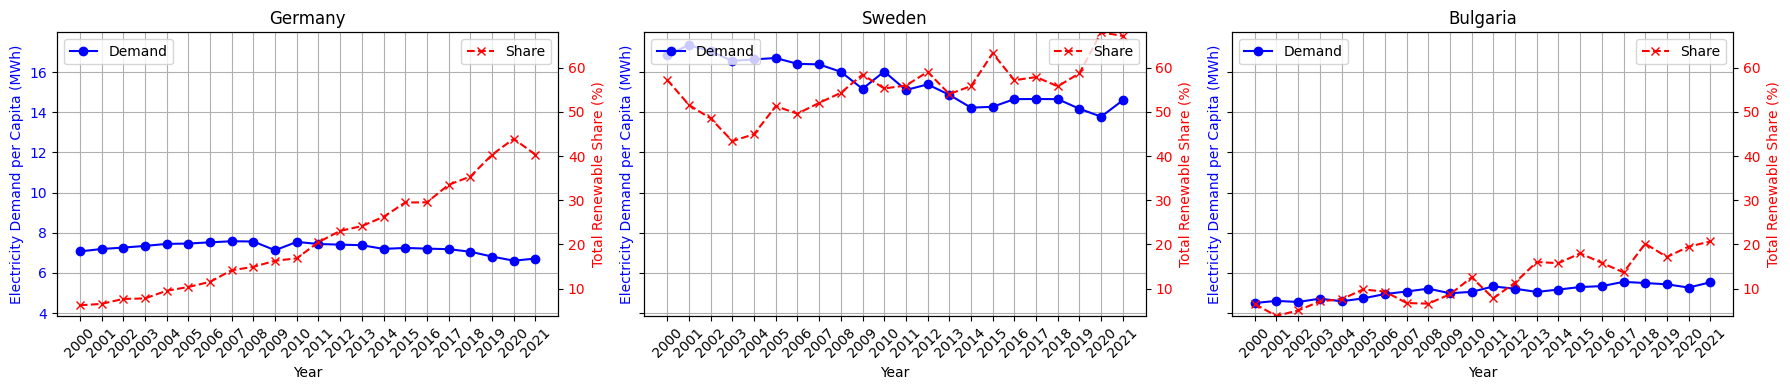

In [3]:
# Create a grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 4), sharex=True, sharey=True)

# Determine the common limits for the secondary y-axis (emissions)
share_min = df_final_combined['Total Renewable Share (%)'].min()
share_max = df_final_combined['Total Renewable Share (%)'].max()

# Loop through each country
for i, country in enumerate(['Germany', 'Sweden', 'Bulgaria']):
    ax = axes[i]
    df_country = df_final_combined[df_final_combined['Country Name'] == country]
    
    # Plotting GDP on primary y-axis
    ax.plot(df_country['Year'], df_country['Electricity Demand per Capita (MWh)'], marker='o', color='b', label='Demand')
    ax.set_xlabel('Year')
    ax.set_ylabel('Electricity Demand per Capita (MWh)', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    ax.grid(True)
    ax.set_xticks(df_country['Year'])
    ax.xaxis.set_tick_params(rotation=45)  
    
    # Create a secondary y-axis for emissions
    ax2 = ax.twinx()
    ax2.plot(df_country['Year'], df_country['Total Renewable Share (%)'], marker='x', color='r', linestyle='--', label='Share')
    ax2.set_ylabel('Total Renewable Share (%)', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    ax2.set_ylim(share_min, share_max)
    
    # Title and legends
    ax.set_title(f'{country}')
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

As we can see, Sweden has a higher electricity demand per capita that has slightly decreased by 13.45% over the years, while its percentage of renewable energy has increased by 17.38%. Sweden needs more energy due to its colder climate than Germany (and perhaps because of its larger industrial sector), hence the higher electricity demand makes sense. Though its economy grew and its percentage of renewable energy increased (6.2% to 40.3%), Germany's energy consumption remained steady or slightly dropped by 5.1%. Bulgaria, however, has the lowest per capita electricity demand, and although its percentage of renewable energy rose from 6.5% to 20.6%, overall energy consumption stayed low at 4.5 to 5.5 MWh.

4.3.2. Impact on CO2-Emissions

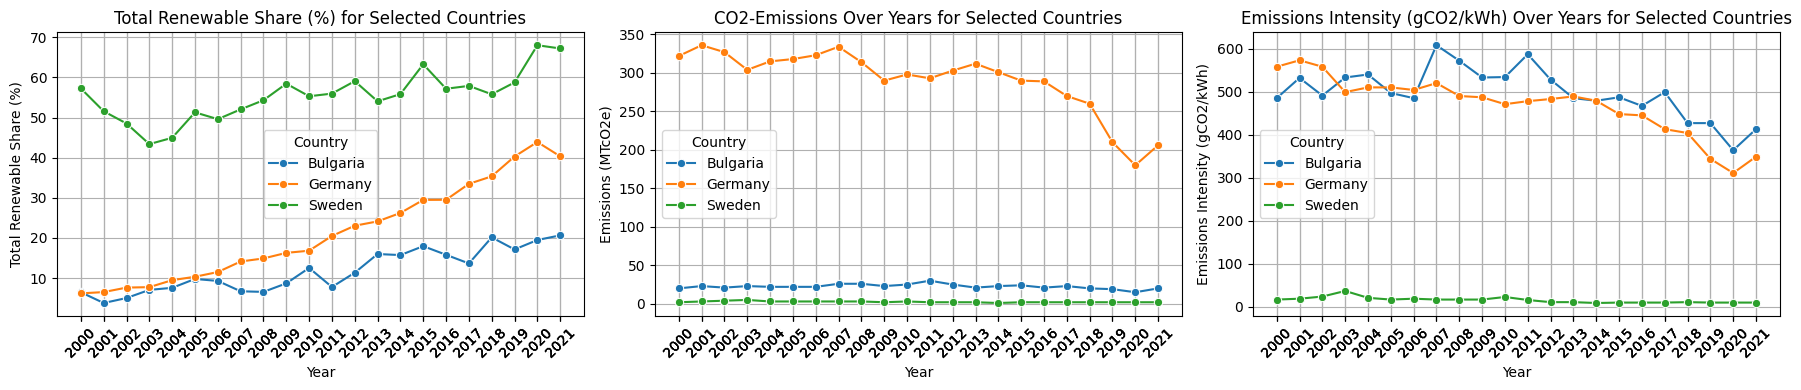

In [5]:
# Create a grid of subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 4))

# Plot for GDP
sns.lineplot(data=df_final_combined, x='Year', y='Total Renewable Share (%)', hue='Country Name', marker='o', ax=ax[0])
ax[0].set_title('Total Renewable Share (%) for Selected Countries')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Total Renewable Share (%)')
ax[0].legend(title='Country')
ax[0].grid(True)
ax[0].set_xticks(df_final_combined['Year'])
ax[0].xaxis.set_tick_params(rotation=45) 

# Plot for Emissions
sns.lineplot(data=df_final_combined, x='Year', y='Emissions (MTcO2e)', hue='Country Name', marker='o', ax=ax[1])
ax[1].set_title('CO2-Emissions Over Years for Selected Countries')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Emissions (MTcO2e)')
ax[1].legend(title='Country')
ax[1].grid(True)
ax[1].set_xticks(df_final_combined['Year']) 
ax[1].xaxis.set_tick_params(rotation=45)  

# Plot for Emissions Intensity
sns.lineplot(data=df_final_combined, x='Year', y='Emissions Intensity (gCO2/kWh)', hue='Country Name', marker='o', ax=ax[2])
ax[2].set_title('Emissions Intensity (gCO2/kWh) Over Years for Selected Countries')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('Emissions Intensity (gCO2/kWh)')
ax[2].legend(title='Country')
ax[2].grid(True)
ax[2].set_xticks(df_final_combined['Year']) 
ax[2].xaxis.set_tick_params(rotation=45)

# Adjust layout and display
plt.tight_layout()
plt.show()

The graph above shows that Sweden has continuously maintained a high percentage of renewable energy and the lowest CO2 emissions (around 2 MtCO2e). Germany's renewable share has been steadily rising while its emissions have been cut by 36.02%. Bulgaria has also managed to keep its emissions at about 20 MtCO2e. Moreover, all three countries show a decrease in emissions intensity, with Sweden is being consistently low, Germany is much declining, and Bulgaria is fluctuating. This shows a good trend towards effective renewable energy and technological improvement, with Sweden leading the way and Germany making significant progress.

### 5. Conclusions

Analysis of GDP growth, adoption of renewable energy, energy consumption, and CO2 emissions for Germany, Sweden, and Bulgaria from 2000 to 2021 shows a complex connection. Key observations from each country are then taken to answer the main question:
* **Germany:** Germany has been making major investment in renewable energy. Because renewable energy adoption has increased significantly, the strong GDP growth has been decoupled from CO2 emissions. Together with improvements in energy efficiency measures, this move towards renewables - especially wind and solar - has enabled Germany to expand economically while lowering emissions and keeping a steady energy consumption.
* **Sweden:** Sweden's consistent high use of hydropower has kept emissions very low despite GDP growth and high per capita energy consumption compares to other two countries, proving the efficiency of stable renewable energy sources in controlling emissions.
* **Bulgaria:** Bulgaria's slow GDP growth and adoption of renewable energy have led to steady emissions and low energy consumption per capita. Slowly but surely, the country's emissions profile is improving as a result of the steady rise in renewable energy. Though not as noticeable as in Germany and Sweden.

As a conclusion, the adoption of renewable energy has been essential in allowing these countries to control their energy use and lower CO2 emissions, showing the connection between environmental sustainability and economic growth. 

### 6. Limitations and Future Studies

However, the limited scope of this analysis may lead to bias and impact the generalizability of the result:

* **Limited Scope of Countries**: Since each country has its economic structure, energy resources, and policy, the analysis of three countries might not be representative of more general worldwide patterns. 
* **Limited Time Frame**: The analysis covers only the years 2000-2021, including the beginning of Corona pandemic. It could not accurately reflect the effects of current post-pandemic economic or policy developments, mainly between 2021 and 2024
* **Data Detail**: The study within each country does not include emissions to a particular sector (e.g. transportation, industrial, residential).
* **Other Factors**: Specific technological developments, environmental policy measures, social factors (such as public acceptance and lifestyle), and international agreements (such as the Paris Agreements on 2016) are other significant factors that are not covered and could give insights to the outcome trends.

Therefore, this study could open further analysis in the future such as: *"Which policies and technological innovations at each countries have been most effective in promoting renewable energy adoption and reducing CO2 emissions?"* 